In [78]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [96]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/ecommerce-data/data.csv", encoding='latin')
df.shape

(541909, 8)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.Quantity.value_counts()

Quantity
 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: count, Length: 722, dtype: int64

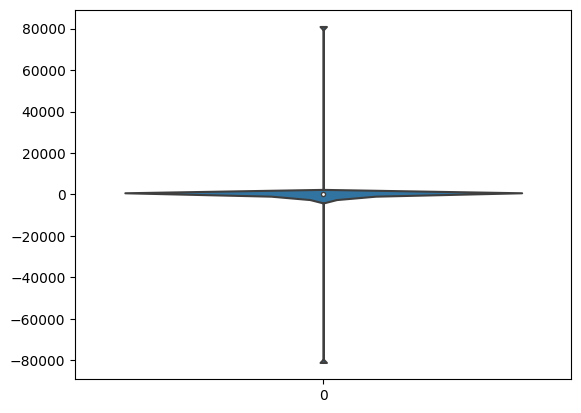

In [8]:
sns.violinplot(df.Quantity);

**Quantity Sold cannot be negative as that doesn't make sense.**

In [9]:
df = df[df.Quantity >= 0]

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df.CustomerID.isna().sum()

133361

In [12]:
df.shape

(531285, 8)

In [13]:
df.dropna(subset=['CustomerID'],how='all',inplace=True)

In [14]:
df.shape

(397924, 8)

In [15]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


# Recency
- how recently the customer has visited the store

**Invoice Date is object so we need to convert it into Date format**

In [17]:
df.InvoiceDate.max()

'9/9/2011 9:52'

In [18]:
df['date'] = pd.to_datetime(df['InvoiceDate'])

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


In [20]:
df.Country.value_counts()

Country
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [21]:
a = df.date.max() - df.date.min()
a

Timedelta('373 days 04:24:00')

In [22]:
a.days

373

- Taking recent purchase date as a parameter to decide the recency of the customer

In [23]:
recent_purchase_date = df.date.max()
recent_purchase_date

Timestamp('2011-12-09 12:50:00')

- grouping customers by customerID as same customer may have visited the store more than once so while comparing we will only consider his/her last visit as a recent visit

In [24]:
recency_df = df.groupby(
    ['CustomerID'],
    as_index=False,
)['date'].max()

recency_df.columns = ['CustomerID', 'RecencyDate']

In [25]:
recency_df.head()

,CustomerID,RecencyDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


- finding out the number of days gap.

In [26]:
recency_df['recency'] = recency_df['RecencyDate'].apply(
    lambda x: (recent_purchase_date - x).days
)

recency_df.head()

,CustomerID,RecencyDate,recency
0,12346.0,2011-01-18 10:01:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


In [27]:
recency_df.drop(
    columns=['RecencyDate'],
    inplace=True
)

In [28]:
recency_df.head()

,CustomerID,recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [29]:
recency_df.shape

(4339, 2)

# Frequency
- how frequently the customer has visited the store

In [30]:
freq_df = df.copy()
freq_df.drop_duplicates(
    subset=['CustomerID', 'InvoiceNo'],
    keep='first',
    inplace=True
)
freq_df.shape

(18536, 9)

In [31]:
freq_df = freq_df.groupby(
    'CustomerID',
    as_index=False
)['InvoiceNo'].count()
freq_df.columns = ['CustomerID', 'Frequency']
freq_df.head()


,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [32]:
freq_df[freq_df.CustomerID == 12748.0]

,CustomerID,Frequency
326,12748.0,210


In [33]:
freq_df.shape

(4339, 2)

# Monetary
- how much money that he had spent in the store

In [34]:
df['Total'] = df['UnitPrice'] * df['Quantity']

In [35]:
df.shape

(397924, 10)

In [36]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34


In [37]:
monetary_df = df.groupby(
    ['CustomerID'],
    as_index=False
)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [38]:
monetary_df.shape

(4339, 2)

# Combining RFM together

In [39]:
rf = recency_df.merge(
    freq_df,
    left_on="CustomerID",
    right_on='CustomerID'
)
rf.shape


(4339, 3)

In [40]:
rf.head()

,CustomerID,recency,Frequency
0,12346.0,325,1
1,12347.0,1,7
2,12348.0,74,4
3,12349.0,18,1
4,12350.0,309,1


In [41]:
rfm = rf.merge(
    monetary_df,
    left_on='CustomerID',
    right_on='CustomerID'
)
rfm.shape

(4339, 4)

In [42]:
rfm.head()

,CustomerID,recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [43]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


In [44]:
rfm.describe()

,CustomerID,recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,91.518322,4.271952,2053.793018
std,1721.889758,100.009747,7.705493,8988.248381
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,17.000000,1.000000,307.245000
50%,15299.000000,50.000000,2.000000,674.450000
75%,16778.500000,141.000000,5.000000,1661.640000
max,18287.000000,373.000000,210.000000,280206.020000


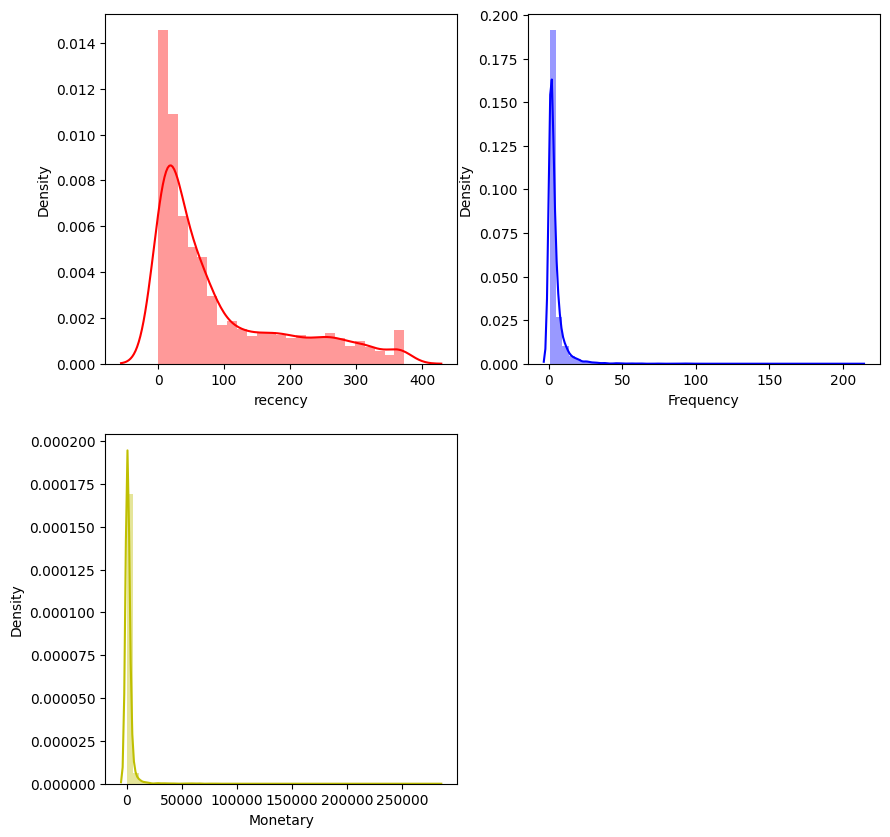

In [119]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.distplot(rfm['recency'], color='r')
plt.subplot(2, 2, 2)
sns.distplot(rfm['Frequency'], color='b')
plt.subplot(2, 2, 3)
sns.distplot(rfm['Monetary'], color='y')
plt.show()

In [45]:
rfm.recency.describe()

count    4339.000000
mean       91.518322
std       100.009747
min         0.000000
25%        17.000000
50%        50.000000
75%       141.000000
max       373.000000
Name: recency, dtype: float64

In [88]:
fig = px.box(rfm, y = 'recency')

fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Recency</b>',
)
fig.show()

In [120]:
fig = px.box(rfm, y = 'Frequency')

fig.update_layout(
    autosize=True,
    width=750,
    height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Frequency</b>',
)
fig.show()

In [89]:
fig = px.box(rfm, y = 'Monetary')

fig.update_layout(
    autosize=True,
    width=750,
    height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Monetary</b>',
)
fig.show()

In [46]:
quantiles = rfm.quantile([0.25, 0.5, 0.75, 1])
quantiles.drop(
    ['CustomerID'],
    axis=1,
    inplace=True
)

In [47]:
quantiles.head()

,recency,Frequency,Monetary
0.25,17.0,1.0,307.245
0.50,50.0,2.0,674.450
0.75,141.0,5.0,1661.640
1.00,373.0,210.0,280206.020


In [48]:
quantiles.recency[0.50]

50.0

In [49]:
def label_customers(value, feature, quantile_df):
    if feature == 'recency':
        if value <= quantile_df[feature][0.25]:
            return 4
        if value <= quantile_df[feature][0.5]:
            return 3
        if value <= quantile_df[feature][0.75]:
            return 2
        else:
            return 1
    else:
        if value <= quantile_df[feature][0.25]:
            return 1
        if value <= quantile_df[feature][0.5]:
            return 2
        if value <= quantile_df[feature][0.75]:
            return 3
        else:
            return 4

    

In [50]:
rfm['r_quantile'] = rfm.recency.apply(
    label_customers,
    args=('recency', quantiles)
)
rfm.head()

,CustomerID,recency,Frequency,Monetary,r_quantile
0,12346.0,325,1,77183.60,1
1,12347.0,1,7,4310.00,4
2,12348.0,74,4,1797.24,2
3,12349.0,18,1,1757.55,3
4,12350.0,309,1,334.40,1


In [51]:
rfm['f_quantile'] = rfm.Frequency.apply(
    label_customers,
    args=('Frequency', quantiles)
)
rfm.head()

,CustomerID,recency,Frequency,Monetary,r_quantile,f_quantile
0,12346.0,325,1,77183.60,1,1
1,12347.0,1,7,4310.00,4,4
2,12348.0,74,4,1797.24,2,3
3,12349.0,18,1,1757.55,3,1
4,12350.0,309,1,334.40,1,1


In [52]:
rfm['m_quantile'] = rfm.Monetary.apply(
    label_customers,
    args=('Monetary', quantiles)
)
rfm.head()

,CustomerID,recency,Frequency,Monetary,r_quantile,f_quantile,m_quantile
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,1,7,4310.00,4,4,4
2,12348.0,74,4,1797.24,2,3,4
3,12349.0,18,1,1757.55,3,1,4
4,12350.0,309,1,334.40,1,1,2


In [53]:
rfm['rfm_quantile'] = rfm['r_quantile'].astype(str) +  rfm['f_quantile'].astype(str) + rfm['m_quantile'].astype(str)
rfm.head()

,CustomerID,recency,Frequency,Monetary,r_quantile,f_quantile,m_quantile,rfm_quantile
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,1,7,4310.00,4,4,4,444
2,12348.0,74,4,1797.24,2,3,4,234
3,12349.0,18,1,1757.55,3,1,4,314
4,12350.0,309,1,334.40,1,1,2,112


In [ ]:
fig = px.histogram(df, x="Churn", color=column, title=f"<b>{column} distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_traces(hoverinfo="all", textfont_size=16)
fig.show()

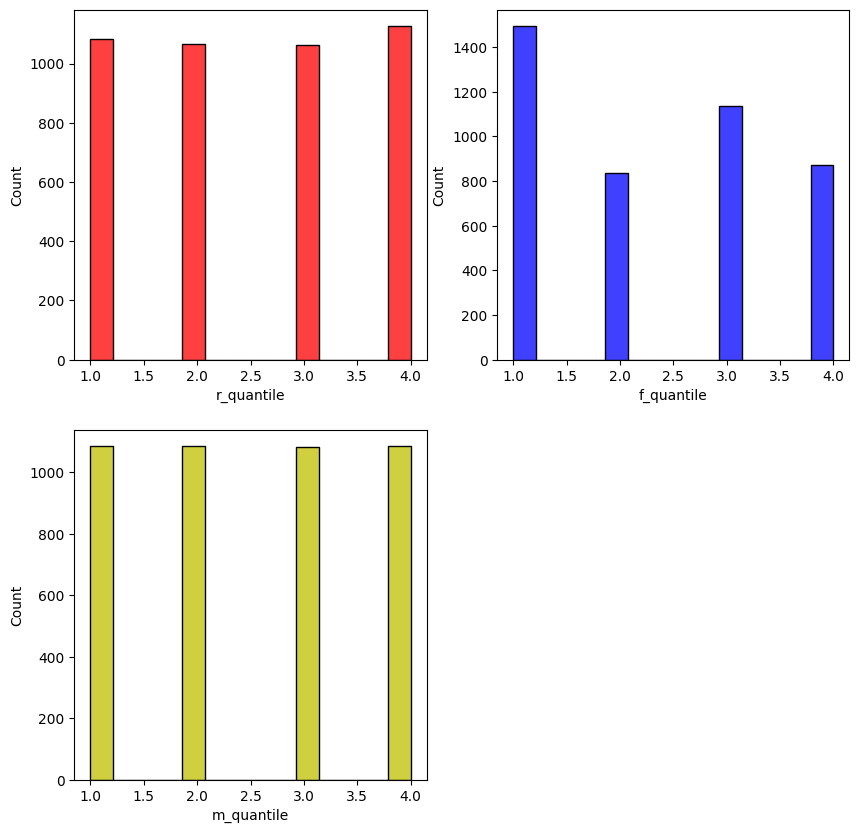

In [105]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.histplot(rfm['r_quantile'], color='r')
plt.subplot(2, 2, 2)
sns.histplot(rfm['f_quantile'], color='b')
plt.subplot(2, 2, 3)
sns.histplot(rfm['m_quantile'], color='y')
plt.show()

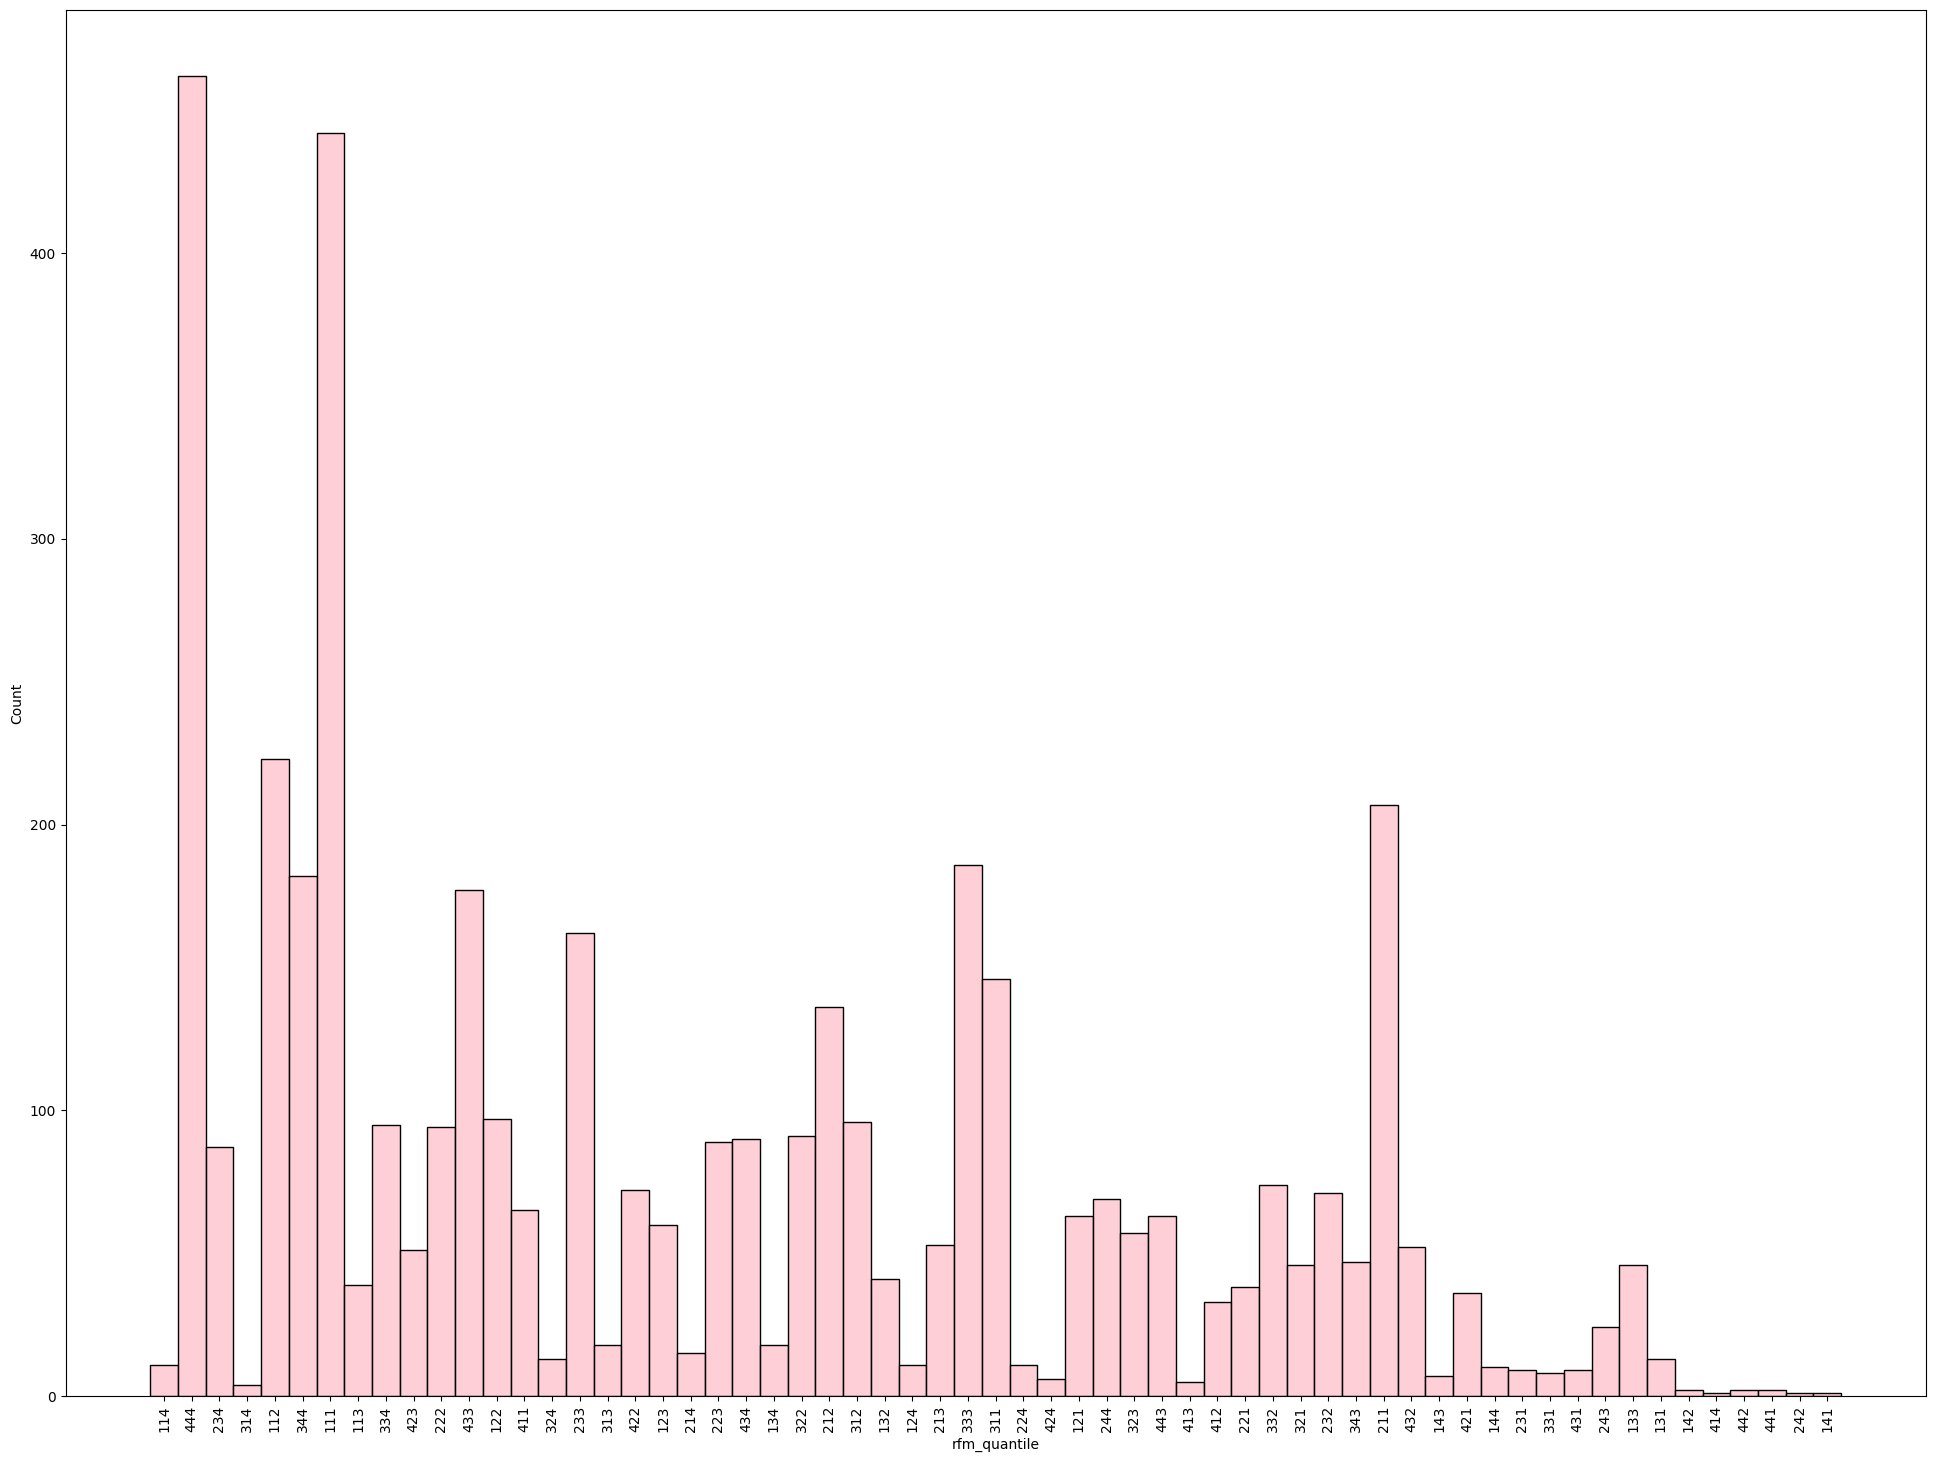

In [118]:
plt.figure(figsize=(24, 18))
sns.histplot(rfm['rfm_quantile'], color='pink')
plt.xticks(rotation=90);

In [54]:
def customer_segments(value):
    if value == '444':
        return "Best Customer"
    if value[1] == '4':
        return "Loyal Customer"
    if value[2] == '4':
        return "Big Spender"
    if value == "111":
        return "DeadBeats"
    if value[0] == '1' and value[2] == '1' and value[1] != '1':
        return "Lost Customer"
    else:
        return "New Customer"
    

In [56]:
rfm['Segmentation'] = rfm.rfm_quantile.apply(
    customer_segments,
)

In [57]:
rfm.head()

,CustomerID,recency,Frequency,Monetary,r_quantile,f_quantile,m_quantile,rfm_quantile,Segmentation
0,12346.0,325,1,77183.60,1,1,4,114,Big Spender
1,12347.0,1,7,4310.00,4,4,4,444,Best Customer
2,12348.0,74,4,1797.24,2,3,4,234,Big Spender
3,12349.0,18,1,1757.55,3,1,4,314,Big Spender
4,12350.0,309,1,334.40,1,1,2,112,New Customer


In [58]:
rfm.Segmentation.value_counts()

Segmentation
New Customer      2587
Best Customer      462
DeadBeats          442
Loyal Customer     410
Big Spender        362
Lost Customer       76
Name: count, dtype: int64

In [75]:
labels = list((rfm['Segmentation'].value_counts()).index)
values = rfm['Segmentation'].value_counts()
# Create subplots: use 'domain' type for Pie subplot
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
title = f"<b>Customer Segmentation</b>"

fig.update_layout(
    title=dict(text=title, x=0.5, xanchor='center'),
    showlegend=True,
)
fig.update_traces(hole=.2, hoverinfo="all", textfont_size=16)
fig.show()

In [59]:
rfm[rfm.Segmentation == "DeadBeats"].rfm_quantile.value_counts()

rfm_quantile
111    442
Name: count, dtype: int64

In [60]:
def label_target(value):
    if value == "DeadBeats":
        return "No Use"
    if value == "Lost Customer":
        return "Churn"
    else:
        return "Non Churn"

In [61]:
def label_target_numeric(value):
    if value == "DeadBeats":
        return 0
    if value == "Lost Customer":
        return 1
    else:
        return 2

In [62]:
rfm['target'] = rfm.Segmentation.apply(label_target)
rfm['target_variable'] = rfm.Segmentation.apply(label_target_numeric)
rfm.head()

,CustomerID,recency,Frequency,Monetary,r_quantile,f_quantile,m_quantile,rfm_quantile,Segmentation,target,target_variable
0,12346.0,325,1,77183.60,1,1,4,114,Big Spender,Non Churn,2
1,12347.0,1,7,4310.00,4,4,4,444,Best Customer,Non Churn,2
2,12348.0,74,4,1797.24,2,3,4,234,Big Spender,Non Churn,2
3,12349.0,18,1,1757.55,3,1,4,314,Big Spender,Non Churn,2
4,12350.0,309,1,334.40,1,1,2,112,New Customer,Non Churn,2


In [63]:
rfm.target.value_counts()

target
Non Churn    3821
No Use        442
Churn          76
Name: count, dtype: int64

In [64]:
rfm.target_variable.value_counts()

target_variable
2    3821
0     442
1      76
Name: count, dtype: int64

In [77]:
labels = list((rfm['target'].value_counts()).index)
values = rfm['target'].value_counts()
# Create subplots: use 'domain' type for Pie subplot
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
title = f"<b>Churn Distribution</b>"

fig.update_layout(
    title=dict(text=title, x=0.5, xanchor='center'),
    showlegend=True,
)
fig.update_traces(hole=.2, hoverinfo="all", textfont_size=16)
fig.show()

In [65]:
rfm.to_csv("rfm_analysis.csv", index=False)

In [66]:
rfm.head()

,CustomerID,recency,Frequency,Monetary,r_quantile,f_quantile,m_quantile,rfm_quantile,Segmentation,target,target_variable
0,12346.0,325,1,77183.60,1,1,4,114,Big Spender,Non Churn,2
1,12347.0,1,7,4310.00,4,4,4,444,Best Customer,Non Churn,2
2,12348.0,74,4,1797.24,2,3,4,234,Big Spender,Non Churn,2
3,12349.0,18,1,1757.55,3,1,4,314,Big Spender,Non Churn,2
4,12350.0,309,1,334.40,1,1,2,112,New Customer,Non Churn,2


In [68]:
rfm.shape

(4339, 11)

In [67]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34


In [69]:
df.shape

(397924, 10)

In [70]:
finalized_rfm_df = df.merge(
    rfm,
    left_on='CustomerID',
    right_on='CustomerID'
)
finalized_rfm_df.shape

(397924, 20)

In [71]:
finalized_rfm_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total,recency,Frequency,Monetary,r_quantile,f_quantile,m_quantile,rfm_quantile,Segmentation,target,target_variable
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30,371,34,5391.21,1,4,4,144,Loyal Customer,Non Churn,2
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,371,34,5391.21,1,4,4,144,Loyal Customer,Non Churn,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00,371,34,5391.21,1,4,4,144,Loyal Customer,Non Churn,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,371,34,5391.21,1,4,4,144,Loyal Customer,Non Churn,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,371,34,5391.21,1,4,4,144,Loyal Customer,Non Churn,2


In [72]:
finalized_rfm_df.to_csv("rfm_ecommerce_data.csv", index=False)